# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

# Daftar Isi

* [Tujuan](#)
* [Hipotesis](#)
* [Tahapan](#)
* [1. Pra-pemrosesan](#)
    * [1.1. Memuat Data](#)
    * [1.2. Mengeksploarasi Data Awal](#)
    * [Kesimpulan dan Langkah-Langkah Selanjutnya](#)
        * [Nilai yang Hilang](#)
        * [Gaya Penulisan](#)
        * [Duplikat](#)
        * [Anomali Data](#)
    * [1.3. Mengatasi Nilai-Nilai yang Hilang](#)
    * [1.4. Memperbaiki Tipe Data](#)
    * [1.5. Memperbaiki Kualitas Data](#)
* [2. Analisis Data Exploratif (EDA)](#)
    * [2.1. Memeriksa Data yang Sudah Bersih](#)
    * [2.2. Mempelajari Parameter Inti](#)
        * [Kesimpulan](#)
    * [2.3. Mempelajari dan Menangani Outlier](#)
    * [2.4. Masa Berlaku Iklan](#)
    * [2.5. Harga Rata-Rata Setiap Jenis Kendaraan](#)
    * [2.6. Faktor Harga](#)
    * [Kesimpulan Umum](#)
        * [A. Pra-pemrosesan](#)
        * [B. Analisis Data Eksploratif (EDA)](#)    

## Tujuan

Proyek ini berfokus pada EDA dan Data Visualization untuk menentukan hubungan dan faktor yang paling memengaruhi harga mobil dengan menggunakan teknik statistik dan visualisasi data.

## Hipotesis

1. Harga mobil cenderung lebih murah jika mobil tersebut sudah berusia tua.
2. Mobil dengan jarak tempuh yang lebih kecil umumnya memiliki harga yang lebih murah dibandingkan dengan mobil dengan jarak tempuh yang lebih jauh.
3. Mobil yang memiliki kondisi yang baik cenderung memiliki harga yang lebih tinggi dibandingkan dengan mobil yang kondisinya kurang baik.
4. Secara umum, mobil dengan tipe transmisi matic memiliki harga yang lebih tinggi dibandingkan dengan mobil dengan tipe transmisi manual.
5. Warna mobil yang kurang umum seperti kuning, hijau, biru, dan merah cenderung kurang diminati dan memiliki nilai lebih rendah dibandingkan dengan warna hitam, putih, atau silver.

## Tahapan

1. Pra-pemrosesan Data
2. Analisis Data Exploratif (EDA)

# 1. Pra-pemrosesan

**Import *library* yang dibutuhkan:**

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

## 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


## 1.2. Mengeksplorasi Data Awal

**Deskripsi Data:**


- `price` — Harga mobil
- `model_year` — Tahun produksi mobil
- `model` — Merk dan seri mobil
- `condition` — Kondisi mobil
- `cylinders` — Jumlah silinder mesin mobil
- `fuel` — Gas, disel, dan lain-lain.
- `odometer` — Jarak tempuh kendaraan saat iklan ditayangkan
- `transmission` — Tipe transisi mobil
- `type` — Tipe mobil
- `paint_color` — Warna mobil
- `is_4wd` — Apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — Tanggal iklan ditayangkan
- `days_listed` — Jumlah hari iklan ditayangkan hingga dihapus

In [3]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Check first 10 data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
# Check 10 sample data
data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
13804,7995,2005.0,toyota tundra,excellent,8.0,gas,152000.0,automatic,truck,NaN,NaN,2018-06-10,47
24278,12900,2008.0,ram 1500,like new,8.0,gas,159794.0,automatic,pickup,grey,1.0,2019-03-05,60
4065,28500,NaN,ford f150 supercrew cab xlt,good,6.0,gas,44044.0,other,pickup,black,1.0,2018-09-30,67
46672,8500,2015.0,hyundai sonata,good,4.0,gas,171000.0,automatic,sedan,silver,NaN,2018-09-27,30
47236,7800,2016.0,chevrolet cruze,good,4.0,gas,132078.0,automatic,sedan,silver,NaN,2018-06-07,17
47412,4999,2005.0,subaru outback,excellent,6.0,gas,187100.0,automatic,SUV,silver,1.0,2018-09-15,9
5668,7995,2013.0,toyota tacoma,good,4.0,gas,170000.0,automatic,truck,white,NaN,2018-08-02,6
5040,2500,1985.0,ford mustang,fair,8.0,gas,100000.0,manual,coupe,black,NaN,2018-05-11,49
26927,28900,2015.0,ford f-150,good,6.0,gas,117397.0,automatic,truck,white,1.0,2018-11-02,46
21550,4900,2013.0,nissan versa,fair,4.0,gas,98185.0,automatic,sedan,silver,NaN,2018-10-13,39


**Kesimpulan Sementara :**

- Terlihat bahwa terdapat beberapa nilai yang hilang pada data 10 baris pertama.
- Agar lebih rapi, kolom model_year sebaiknya diubah menjadi tipe data integer.
- Untuk membuat kolom condition lebih rapi, sebaiknya nilai string diubah menjadi skala numerik.
- Agar lebih sesuai format, sebaiknya kolom date_posted diubah menjadi tipe data datetime64.

In [6]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [7]:
# Check unique data from 'transmisson' and 'type' column
print(data['transmission'].unique())
print(data['type'].unique())

['automatic' 'manual' 'other']
['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


In [8]:
# Check duplicated data
data.duplicated().sum()

0

**Kesimpulan Sementara:**

- Dari data tersebut terlihat bahwa beberapa kolom seperti model_year, cylinders, odometer, paint_color, dan is_4wd memiliki nilai yang hilang yang perlu dianalisis lebih lanjut.
- Kolom transmission dan type terdapat nilai "other" yang perlu dianalisis lebih lanjut untuk memahami apakah nilai tersebut valid atau tidak.
- Dapat dilihat bahwa dataset tidak memiliki duplikat pada datanya, sehingga tidak diperlukan tindakan untuk menghapus data duplikat.

In [9]:
# Calculating some statistical data 
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**Keseimpulan Sementara:**

Perlu dilakukan analisis lebih lanjut pada kolom `price` karena terdapat nilai yang tidak wajar, yaitu nilai minimum adalah 1.000000, sehingga perlu dicari penyebabnya.

### Kesimpulan dan Langkah-Langkah Selanjutnya

#### Nilai yang Hilang

Setiap baris dalam tabel berisi informasi tentang harga mobil yang telah dijual. Terdapat beberapa kolom yang memberikan deskripsi tentang mobil itu sendiri, seperti tahun produksi, merek, kondisi, silinder mesin, tipe bahan bakar, jarak tempuh, tipe transmisi, tipe mobil, warna, dan apakah mobil tersebut memiliki penggerak empat roda. Sementara itu, ada juga kolom yang menyimpan informasi terkait iklan mobil yang telah ditayangkan, seperti tanggal dan lama iklan ditayangkan sebelum dihapus.

Data yang tersedia sudah cukup untuk dilakukan pengujian hipotesis, namun terdapat beberapa nilai yang hilang pada dataset tersebut.

- Nilai-nilai yang hilang dalam kolom cylinders dan is_4wd tidak begitu penting dan dapat diganti dengan penanda yang jelas.
- Nilai-nilai yang hilang dalam kolom model_year, odometer, dan paint_color perlu di-evaluasi karena dapat memengaruhi perbandingan harga mobil. Namun, alasan mengapa data tersebut hilang belum diketahui dalam proyek ini.

Data yang hilang dapat memberikan informasi penting untuk memperbaiki data dan menghindari bias dalam analisis, namun keterbatasan dalam proyek ini mengharuskan fokus pada analisis yang dapat dilakukan dengan data yang tersedia.

#### Gaya Penulisan

Setelah menyelesaikan nilai yang hilang, selanjutnya mulai untuk merapihkan data.

- Konversi nilai pada kolom `model_year` ke tipe data integer.
- Transformasi nilai pada kolom `condition` menjadi skala angka.
- Konversi tipe data kolom `date_posted` menjadi datetime64.
- Tambahkan informasi hari dalam minggu, bulan, dan tahun pada data iklan yang ditayangkan.
- Tambahkan kolom baru yang menunjukkan usia kendaraan (dalam tahun) saat iklan ditayangkan dan rata-rata jarak tempuh kendaraan per tahun.

#### Duplikat

Data tidak memiliki duplikat, sehingga tidak perlu dilakukan analisis duplikat awal.

#### Anomali Data 

Setelah pemeriksaan duplikat, perlu memperhatikan data anomali yang dapat mempengaruhi analisis penelitian.

- Kolom `price` memiliki nilai yang tidak wajar, yaitu 1.000.000 pada harga mobil.
- Pada kolom `transmission` dan `type` terdapat nilai "other" yang seharusnya diketahui karena merupakan data yang mendeskripsikan mobil.

## 1.3. Mengatasi Nilai-Nilai yang Hilang

In [10]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

**Langkah awal** untuk menangani nilai-nilai yang hilang adalah dengan menghitung persentasenya, dan membandingkannya dengan keseluruhan data untuk mengetahui dampak nilai-nilai yang hilang terhadap dataset.

In [11]:
# Loop for checking the percentage of missing values per total values each column
for col in data.columns:
    missing = data[col].isnull().sum()
    total = data[col].shape[0]
    percent = (missing/total) * 100
    print(f"Kolom {col}: {percent:.2f}% nilai yang hilang.")

Kolom price: 0.00% nilai yang hilang.
Kolom model_year: 7.02% nilai yang hilang.
Kolom model: 0.00% nilai yang hilang.
Kolom condition: 0.00% nilai yang hilang.
Kolom cylinders: 10.21% nilai yang hilang.
Kolom fuel: 0.00% nilai yang hilang.
Kolom odometer: 15.32% nilai yang hilang.
Kolom transmission: 0.00% nilai yang hilang.
Kolom type: 0.00% nilai yang hilang.
Kolom paint_color: 17.99% nilai yang hilang.
Kolom is_4wd: 50.37% nilai yang hilang.
Kolom date_posted: 0.00% nilai yang hilang.
Kolom days_listed: 0.00% nilai yang hilang.


**Kesimpulan Sementara :**

- Persentase data yang hilang pada kolom `is_4wd` adalah 50.37%.
- Persentase data yang hilang pada kolom `paint_color` adalah 17.99%.
- Persentase data yang hilang pada kolom `odometer` adalah 15.32%.
- Persentase data yang hilang pada kolom `cylinders` adalah 10.21%.
- Persentase data yang hilang pada kolom `model_year` adalah 7.02%.

Dalam beberapa situasi, jika persentase nilai yang hilang tidak signifikan (katakanlah, 5-10%), nilai tersebut dapat dihapus dari dataset.

**Langkah selanjutnya** dalam menangani nilai-nilai yang hilang adalah dengan menentukan apakah nilai yang hilang termasuk dalam variabel kategoris atau kuantitatif.

In [12]:
# Function for finding variable type each column
def find_missing_variable_type(data):
    
    missing_variable_type = {}
    
    for col in data.columns:
        unique_values = data[col].nunique()
        
        # If there are less than 400 unique values, assume the column is categorical
        if unique_values < 400:
            missing_variable_type[col] = "kategoris"
        # Otherwise, assume the column is quantitative
        else:
            missing_variable_type[col] = "kuantitatif"
    
    return missing_variable_type

In [13]:
missing_variable_type = find_missing_variable_type(data)
print(missing_variable_type)

{'price': 'kuantitatif', 'model_year': 'kategoris', 'model': 'kategoris', 'condition': 'kategoris', 'cylinders': 'kategoris', 'fuel': 'kategoris', 'odometer': 'kuantitatif', 'transmission': 'kategoris', 'type': 'kategoris', 'paint_color': 'kategoris', 'is_4wd': 'kategoris', 'date_posted': 'kategoris', 'days_listed': 'kategoris'}


**Kesimpulan Sementara:**

- Kolom `is_4wd` memiliki missing value yang termasuk dalam kategori variabel.
- Kolom `paint_color` memiliki missing value yang masuk ke dalam kategori variabel kategoris.
- Kolom `odometer` memiliki missing value yang termasuk dalam kategori variabel kuantitatif.
- Kolom `cylinders` memiliki missing value yang termasuk dalam kategori variabel kategoris.
- Kolom `model_year` memiliki nilai hilang yang termasuk variabel katagoris.

**Langkah ketiga** dalam penanganan missing value adalah melakukan imputasi atau pengisian nilai yang hilang dengan nilai yang tepat berdasarkan metode yang telah ditentukan.

1. Apabila variabel yang memiliki missing value adalah kategoris, maka langkah selanjutnya adalah menentukan apakah terdapat pola pada missing value tersebut.

 - Jika tidak terdapat pola pada nilai missing value pada variabel kategoris, maka nilai tersebut dapat diganti dengan nilai default seperti string kosong atau kata tertentu.
 - Apabila missing value pada variabel kategoris memiliki pola, maka diperlukan analisis lebih lanjut untuk menentukan metode imputasi yang tepat.
 
2. Pada variabel kuantitatif yang memiliki missing value, langkah selanjutnya adalah menentukan apakah terdapat outlier yang signifikan pada data tersebut.

 - Apabila tidak terdapat outlier yang signifikan pada variabel kuantitatif dengan missing value, maka nilai tersebut dapat diimputasi dengan menggunakan rata-rata data pada kolom atau seluruh dataset.
 - Apabila data pada variabel kuantitatif dengan missing value memiliki outlier yang signifikan, maka nilai tersebut dapat diimputasi dengan menggunakan median data pada kolom atau seluruh dataset.

In [14]:
# Function for checking missing pattern
def check_missing_pattern(data):
    
    missing_pattern = {}
    
    for col in data.columns:
        # Create a boolean mask to identify missing values
        mask = data[col].isnull()
        # Get sum of missing values
        missing = data[col].isnull().sum()
        
        # If there are no missing values, the pattern is "none"
        if missing == 0:
            missing_pattern[col] = "none"
        # If there is a missing value, check if there is a pattern
        else:
            # Create a boolean mask to identify non-missing values
            mask_not_missing = ~mask
            # Count the number of unique values in a column
            unique_values = data[col].nunique()
            # If there are fewer unique values than missing values, the pattern is "random"
            if unique_values < missing:
                missing_pattern[col] = "random"
            # Otherwise, the pattern is "pattern"
            else:
                missing_pattern[col] = "pattern"
    
    return missing_pattern

In [15]:
# Check the missing pattern
missing_pattern = check_missing_pattern(data)
print(missing_pattern)

{'price': 'none', 'model_year': 'random', 'model': 'none', 'condition': 'none', 'cylinders': 'random', 'fuel': 'none', 'odometer': 'pattern', 'transmission': 'none', 'type': 'none', 'paint_color': 'random', 'is_4wd': 'random', 'date_posted': 'none', 'days_listed': 'none'}


**Kesimpulan Sementara:**

- Kolom `is_4wd` memiliki missing value yang tidak menunjukkan adanya pola tertentu pada data.
- Kolom `paint_color` memiliki missing value yang tidak memiliki pola tertentu pada data.
- Kolom `odometer` memiliki missing value yang menunjukkan adanya pola tertentu pada data.
- Kolom `cylinders` memiliki missing value yang tidak menunjukkan adanya pola tertentu pada data.
- Kolom `model_year` memiliki missing value yang tidak menunjukkan adanya pola tertentu pada data.

**Kolom** `is_4wd` memiliki missing value sebesar 50.37%, yang termasuk dalam kategori variabel kategoris dan tidak menunjukkan adanya pola tertentu pada data. Oleh karena itu, missing value tersebut dapat diimputasi dengan nilai lain, yaitu 0

In [16]:
# Filling the missing values with fillna()
data['is_4wd'] = data['is_4wd'].fillna(0)

**Kolom** `paint_color` memiliki missing value sebesar 17.99%, yang termasuk dalam kategori variabel kategoris dan tidak menunjukkan adanya pola tertentu pada data. Oleh karena itu, missing value tersebut dapat diimputasi dengan nilai lain, yaitu 'unknown'.

In [17]:
# Filling the missing values with fillna()
data['paint_color'] = data['paint_color'].fillna('unknown')

**Kolom** `odometer` memiliki missing value sebesar 15.32%, yang termasuk dalam kategori variabel kuantitatif. Oleh karena itu, langkah pertama dalam menangani missing value pada kolom tersebut adalah menentukan terlebih dahulu apakah terdapat outlier pada data tersebut.

**Kolom** `cylinders` memiliki missing value sebesar 10.21%, yang termasuk dalam kategori variabel kategoris dan tidak menunjukkan adanya pola tertentu pada data. Oleh karena itu, missing value tersebut dapat diimputasi dengan nilai lain, yaitu 0.0.

In [18]:
# Filling the missing values with fillna()
median_cylinders = data['cylinders'].median()
data['cylinders'] = data['cylinders'].fillna(median_cylinders)

**Kolom** `model_year` memiliki missing value sebesar 7.02%, yang termasuk dalam kategori variabel kategoris dan tidak menunjukkan adanya pola tertentu pada data. Oleh karena kolom ini sangat penting dalam penelitian, maka missing value tersebut perlu diimputasi. Namun, karena kolom ini adalah variabel kategoris, tidak dapat dihitung median. Sehingga perlu dipertimbangkan imputasi dengan teknik lain seperti modus atau kategori yang paling sering muncul pada data.

In [19]:
# Check the missing values descending
data.isna().sum().sort_values(ascending=False)

odometer        7892
model_year      3619
price              0
model              0
condition          0
cylinders          0
fuel               0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Untuk mengatasi nilai hilang pada tiap kolom, dipilih untuk mengisi dengan median sebagai teknik imputasi karena pada beberapa kolom diduga terdapat adanya outlier yang signifikan. Sebelum melakukan imputasi, dibuat terlebih dahulu data baru yang berisi nilai yang hilang diisi dengan median agar tidak mempengaruhi data asli. Dengan hipotesis ini, diharapkan data hasil imputasi tetap memiliki karakteristik yang serupa dengan data asli dan dapat digunakan untuk analisis lebih lanjut.

In [20]:
# Create new dataset
data_new = data.copy()

# Function for filling missing values with mode
def fill_missing_value_mode(dataframe, agg_column, value_column):
    
    # Calculates the mode value for each group in the aggregation column
    grouped_values = dataframe.groupby(agg_column)[value_column].apply(lambda x: x.mode().iloc[0]).reset_index()
    
    # Fill in the missing values in the column with the mode value calculated for each group
    dataframe[value_column] = dataframe[value_column].fillna(dataframe[agg_column].map(grouped_values.set_index(agg_column)[value_column]))
    
    return dataframe

In [21]:
# Fill in the missing values in the odometer column using median
data_new['odometer'] = data_new['odometer'].fillna(data_new['odometer'].median())

# Fill in the missing values in the model_year column using mode
data_new['model_year'] = data_new.groupby('model')['model_year'].apply(lambda x: x.fillna(x.mode()[0]))

In [22]:
# Check the missing values
data_new.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## 1.4. Memperbaiki Tipe Data

Data pada kolom `model_year` diubah menjadi integer.

In [23]:
# Change the model_year type to integer
data_new['model_year'] = data_new['model_year'].astype(int)

Data pada kolom `condition` diubah menjadi skala numerik.

In [24]:
# Function to change the condition values into numeric scale
def conditions(scale):   
    if scale == 'new':
        return 5
    if scale == 'like new':
        return 4
    if scale == 'excellent':
        return 3
    if scale == 'good':
        return 2
    if scale == 'fair':
        return 1
    else:
        return 0
    return 'Unidentified' 

In [25]:
# Apply the function
data_new['condition'] = data_new['condition'].apply(conditions)
data_new['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Data pada kolom `date_posted` diubah formatnya menjadi format datetime64.

In [26]:
# Change date_posted format to datetime64
data_new['date_posted'] = pd.to_datetime(data_new['date_posted'], format='%Y-%m-%d')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 5.1+ MB


## 1.5. Memperbaiki Kualitas Data

Tambahkan kolom `day_of_week`, `month`, dan `year` yang berisi informasi hari dalam minggu, bulan, dan tahun iklan ditayangkan pada dataset.

In [27]:
# Add day_of_week, month, and year column
data_new['day_of_week'] = data_new['date_posted'].dt.day_name()
data_new['month'] = data_new['date_posted'].dt.month_name()
data_new['year'] = data_new['date_posted'].dt.year

Membuat kolom baru yang menunjukkan usia kendaraan pada saat iklan ditayangkan dengan menghitung selisih antara tahun saat iklan ditayangkan dengan tahun pembuatan kendaraan.

In [28]:
# Add car_age column
data_new['car_age'] = (data_new['year'] + 1) - data_new['model_year']

Kolom baru `jarak_tempuh_tahunan` ditambahkan ke dalam dataset, yang memuat jarak tempuh rata-rata kendaraan per tahun, dihitung berdasarkan perbedaan antara kolom `model_year` dan `odometer`.

In [29]:
# Add avg_mileage column
data_new['avg_mileage'] = data_new['odometer'] / data_new['car_age']

# 2. Analisis Data Exploratif (EDA)

## 2.1. Memeriksa Data yang Sudah Bersih

In [30]:
# Check general data_new info
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_of_week   51525 non-null  object        
 14  month         51525 non-null  object        
 15  year          51525 non-null  int64 

In [31]:
# Check 10 sample
data_new.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,car_age,avg_mileage
611,5500,2011,subaru impreza,2,4.0,gas,140312.0,automatic,sedan,red,1.0,2019-04-15,48,Monday,April,2019,9,15590.222222
16965,15295,2018,chevrolet cruze,3,4.0,gas,113000.0,automatic,sedan,unknown,0.0,2019-03-02,33,Saturday,March,2019,2,56500.000000
41580,17845,2011,toyota tundra,2,8.0,gas,113000.0,automatic,truck,grey,1.0,2018-10-07,11,Sunday,October,2018,8,14125.000000
33564,5900,2002,ram 2500,2,10.0,gas,96000.0,automatic,truck,unknown,0.0,2019-01-07,79,Monday,January,2019,18,5333.333333
49951,9500,2015,dodge grand caravan,3,6.0,gas,84519.0,automatic,mini-van,grey,0.0,2018-08-17,84,Friday,August,2018,4,21129.750000
21422,6500,2013,chevrolet equinox,3,4.0,gas,94000.0,automatic,SUV,custom,0.0,2019-01-22,35,Tuesday,January,2019,7,13428.571429
40942,1800,2008,toyota 4runner,1,6.0,gas,253474.0,automatic,SUV,unknown,1.0,2019-04-14,45,Sunday,April,2019,12,21122.833333
22888,3900,2008,toyota prius,2,4.0,hybrid,238000.0,automatic,hatchback,red,0.0,2018-12-26,24,Wednesday,December,2018,11,21636.363636
44853,4800,2005,honda cr-v,3,4.0,gas,162000.0,automatic,SUV,brown,1.0,2018-05-11,53,Friday,May,2018,14,11571.428571
20803,10500,2016,chevrolet traverse,2,6.0,gas,55659.0,automatic,SUV,unknown,1.0,2019-01-06,18,Sunday,January,2019,4,13914.750000


In [32]:
# Calculating some statistical data
data_new.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,car_age,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.871033,2.637535,6.112450,115162.352179,0.496303,39.55476,2018.307462,9.436429,15844.238152
std,10040.803015,6.145084,0.712447,1.573784,59909.264385,0.499991,28.20427,0.461447,6.158509,12799.650725
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,79181.000000,0.000000,19.00000,2018.000000,5.000000,9416.666667
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,0.000000,33.00000,2018.000000,8.000000,13261.250000
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,1.000000,53.00000,2019.000000,13.000000,18800.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,111.000000,373200.000000


## 2.2. Mempelajari Parameter Inti

Dalam mengkaji pengaruh outlier terhadap bentuk dan kemudahan pembacaan analisis, beberapa parameter yang dianggap relevan perlu dipertimbangkan.

- Harga.
- Usia kendaraan ketika iklan ditayangkan,
- Jarak Tempuh,
- Kondisi,
- Jumlah silinder

In [33]:
# Calculating some statistical data
data_new[['price', 'car_age', 'avg_mileage', 'condition', 'cylinders']].describe()

,price,car_age,avg_mileage,condition,cylinders
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,9.436429,15844.238152,2.637535,6.112450
std,10040.803015,6.158509,12799.650725,0.712447,1.573784
min,1.000000,1.000000,0.000000,0.000000,3.000000
25%,5000.000000,5.000000,9416.666667,2.000000,4.000000
50%,9000.000000,8.000000,13261.250000,3.000000,6.000000
75%,16839.000000,13.000000,18800.000000,3.000000,8.000000
max,375000.000000,111.000000,373200.000000,5.000000,12.000000


Berikut beberapa pertanyaan-pertanyaan dasar untuk memeriksa keakuratan data:

- Berapa jumlah mobil terjual yang tercatat dalam data?
- Berapa banyak model yang diamati?
- Berapa jumlah mobil yang terjual per harinya?
- Model mobil mana yang paling populer?
- Pada hari apa mobil paling banyak terjual?

In [34]:
# Ansewering basic question
print('Jawaban pertanyaan dasar tersebut yaitu:')
total_car_sold = data_new.shape[0]
print('Jumlah mobil terjual:', total_car_sold)
total_model_car = len(data_new['model'].unique())
print('Jumlah model mobil:', total_model_car)
print('Rentang tanggal data diambil:', data_new['date_posted'].min(),'hingga', data['date_posted'].max())
total_days = 7 # simpan jumlah hari observasi
car_sold_per_day =  total_car_sold/total_model_car/total_days
print('Jumlah mobil terjual per hari:', car_sold_per_day)
print('Mobil paling populer yaitu:',data_new['model'].value_counts().head(2))
print('Hari paling ramai yaitu:', data_new['day_of_week'].value_counts().head(1))

Jawaban pertanyaan dasar tersebut yaitu:
Jumlah mobil terjual: 51525
Jumlah model mobil: 100
Rentang tanggal data diambil: 2018-05-01 00:00:00 hingga 2019-04-19
Jumlah mobil terjual per hari: 73.60714285714286
Mobil paling populer yaitu: ford f-150                  2796
chevrolet silverado 1500    2171
Name: model, dtype: int64
Hari paling ramai yaitu: Thursday    7510
Name: day_of_week, dtype: int64


Pendekatan yang akan dilakukan selanjutnya adalah dengan menggunakan diagram data, di mana setiap batang atau bar pada diagram akan merepresentasikan sebuah nilai, dan perbedaan antara nilai-nilai tersebut akan terlihat dengan jelas melalui tinggi-rendahnya batang/bar pada diagram tersebut.

In [35]:
# Calculating some statistical data
data_new[['price', 'car_age', 'avg_mileage', 'condition', 'cylinders']]

,price,car_age,avg_mileage,condition,cylinders
0,9400,8,18125.000000,2,6.0
1,25500,6,14784.166667,2,6.0
2,5500,7,15714.285714,4,4.0
3,1500,17,6647.058824,1,8.0
4,14900,3,26967.666667,3,4.0
...,...,...,...,...,...
51520,9249,6,14689.333333,4,6.0
51521,2700,17,10676.470588,0,4.0
51522,3950,10,12800.000000,3,4.0
51523,7455,6,23262.166667,2,4.0


Kolom `price` dan `odometer` digunakan Histogram dan Boxplot.

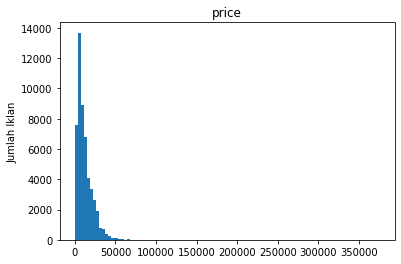

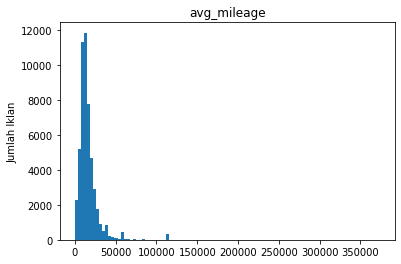

In [36]:
kuantitatif_column = ['price', 'avg_mileage']

for column in kuantitatif_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a histogram for the column
    ax.hist(data_new[column], bins=100)

    # Set the x-axis and y-axis labels
    plt.xlabel('')
    plt.ylabel('Jumlah Iklan')
    plt.title(column)

    # Show the plot
    plt.show()

**Kesimpulan Sementara:**

- Histogram menunjukkan bahwa sebagian besar nilai berada pada angka nol, yang menandakan adanya keanehan pada data. Dalam histogram harga median, outlier terlihat jelas. Nilai-nilai tersebut mungkin merupakan hasil perhitungan yang salah atau strategi pemasaran untuk menarik pelanggan dengan harga murah yang sebenarnya tidak mencerminkan harga asli kendaraan.
- Nilai yang mendekati nol pada kolom `avg_mileage` tidak menjadi masalah, karena mobil bisa memiliki odometer yang masih nol atau belum dipakai.

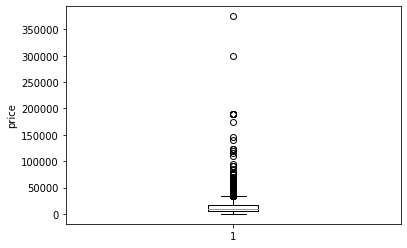

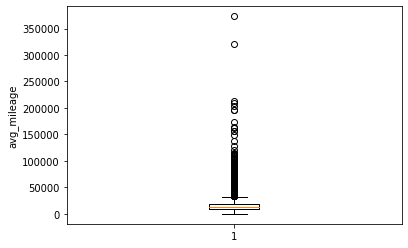

In [37]:
for column in kuantitatif_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a boxplot for the column
    ax.boxplot(data_new[column])

    plt.xlabel('')
    plt.ylabel(column)

    # Show the plot
    plt.show()

In [38]:
# Calculating some statistical data
data_new[['price', 'avg_mileage']].describe()

,price,avg_mileage
count,51525.000000,51525.000000
mean,12132.464920,15844.238152
std,10040.803015,12799.650725
min,1.000000,0.000000
25%,5000.000000,9416.666667
50%,9000.000000,13261.250000
75%,16839.000000,18800.000000
max,375000.000000,373200.000000


**Kesimpulan Sementara:**

Rata-rata `price` lebih tinggi dari median karena ada banyak nilai tinggi dalam distribusinya. Hal ini tidak memengaruhi nilai median.

Karena kolom `car_age`, `condition`, dan `cylinders` adalah variabel kategorikal, maka diagram batang dapat digunakan untuk memvisualisasikan data dalam bentuk grafik yang dapat dengan mudah dipahami.

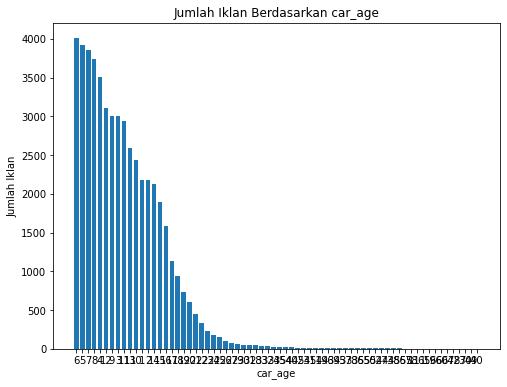

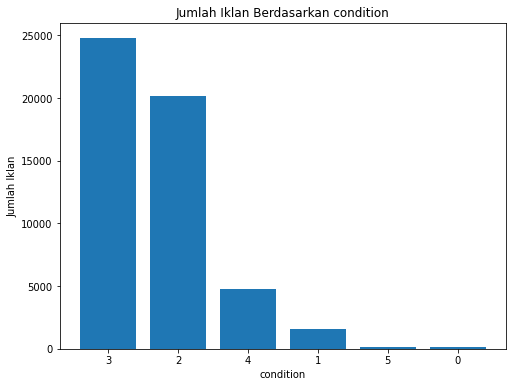

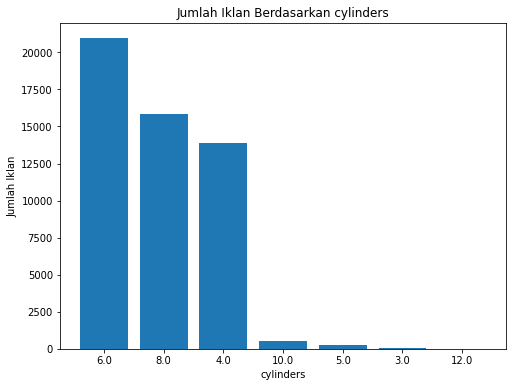

In [39]:
katagoris_column = ['car_age', 'condition', 'cylinders']

# Loop through the column names
for column in katagoris_column:
    # Create a figure and axis with custom figure size
    fig, ax = plt.subplots(figsize=(8,6))

    # Get the counts of each category in the column
    counts = data_new[column].value_counts()

    # Set the x-axis values
    x_pos = range(len(counts))

    # Plot a bar chart with the counts
    ax.bar(x_pos, counts)

    # Set the x-axis labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(counts.index)

    # Set the plot title and axis labels
    plt.title('Jumlah Iklan Berdasarkan {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Jumlah Iklan')

    # Display the plot
    plt.show()

**Kesimpulan Sementara:**

- Berdasarkan data penjualan mobil yang ada, mobil yang berusia 7 tahun memiliki jumlah penjualan paling banyak.
- Berdasarkan data penjualan mobil yang ada, mobil dengan kondisi 3 (excellent) memiliki jumlah penjualan paling banyak.
- Berdasarkan data penjualan mobil yang ada, mobil dengan jumlah silinder 8.0 memiliki jumlah penjualan paling banyak.

### Kesimpulan

1. Data penjualan mobil dari periode 2018-05-01 hingga 2019-04-19 menunjukkan bahwa sebanyak 51525 mobil terjual dengan 100 model mobil yang tersedia. Rata-rata penjualan per hari adalah sekitar 73 unit. Mobil paling populer yang terjual adalah Ford F-150 dengan total penjualan sebanyak 2796 unit. Penjualan mobil terbanyak terjadi pada hari Kamis.
2. Terdapat sekitar 7800 data mobil yang memiliki harga mendekati nol dan beberapa mobil bahkan memiliki harga sebesar 1 dolar. Harga tersebut mungkin salah karena 1 dolar terlalu murah untuk sebuah mobil dan perlu dilakukan pengecekan lebih lanjut.
3. Dalam grafik yang dianalisis terdapat nilai yang terlalu jauh dari sebagian besar data, atau yang dikenal dengan istilah outlier. Outlier tersebut terletak di sekitar angka 40000 dolar hingga 360000 dolar.
4. Lebih dari 7000 unit mobil terjual dengan rata-rata jarak tempuh sekitar 15000 mile per tahun. Terdapat outlier pada rentang jarak tempuh sekitar 21000 hingga 373200 mile per tahun.
5. Data penjualan mobil menunjukkan bahwa mobil berusia 7 tahun memiliki jumlah penjualan paling banyak. Namun, terdapat beberapa mobil yang sangat tua dengan usia mencapai 110 tahun.
6. Berdasarkan data penjualan mobil, mobil dengan kondisi 3 dan 2 memiliki jumlah penjualan paling banyak. Namun, terdapat beberapa mobil yang memiliki kondisi 0 yang menarik untuk diperhatikan.
7. Berdasarkan data penjualan mobil, mobil dengan jumlah silinder mesin 8.0, 6.0, dan 4.0 memiliki jumlah penjualan paling banyak. Namun, terdapat cukup banyak data mobil yang tidak diketahui jumlah silinder mesinnya dan diisi dengan nilai 0.0, yakni sekitar 5000 unit.

## 2.3. Mempelajari dan Menangani Outlier

Berdasarkan hasil pembacaan beberapa parameter sebelumnya, terdapat kemungkinan adanya outlier pada kolom `price`, `avg_mileage`, dan `car_age`. Untuk menghilangkan outlier tersebut, langkah selanjutnya adalah dengan membuat DataFrame baru tanpa nilai outlier dengan cara menentukan batas bawah dan atas untuk rentang nilai normal, dan data yang melewati batas tersebut dianggap sebagai outlier dan dihapus dari DataFrame.

In [40]:
# Function for removing outlier, determine upper and lower whisker
def upper_lower_whisker(column):
    Q1  = data_new[column].quantile(0.25)
    Q3  = data_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    return lower_whisker, upper_whisker

In [41]:
outlier_column = ['price', 'avg_mileage', 'car_age']

In [42]:
# Loop for applying the function
for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    print('Batas bawah outlier dari',column, lower)
    print('Batas atas outlier dari',column, upper)
    print('')

Batas bawah outlier dari price -12758.5
Batas atas outlier dari price 34597.5

Batas bawah outlier dari avg_mileage -4658.333333333334
Batas atas outlier dari avg_mileage 32875.0

Batas bawah outlier dari car_age -7.0
Batas atas outlier dari car_age 25.0



In [43]:
# Loop for cleaning the outlier
data_clean = data_new.copy()

for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    data_clean = data_clean[(data_clean[column] > lower) & (data_clean[column] < upper)]

Untuk membersihkan nilai outlier pada kolom `price` mobil, langkah awal yang perlu dilakukan adalah dengan memeriksa persentase kesalahan data atau error rate-nya terlebih dahulu. Dalam hal ini, dapat digunakan metode seperti z-score atau interquartile range (IQR) untuk mengidentifikasi data yang dianggap sebagai outlier. Setelah itu, data yang dianggap sebagai outlier tersebut dapat dihapus dari DataFrame.

In [44]:
# Check the percentage of wrong price data
wrong_data_price = data_clean[data_clean['price'] < 100]

percentage_wrong_data_price = wrong_data_price['price'].count() / data_clean['price'].count()
print("Persentase data yang bermasalah pada kolom 'price' yaitu:{:.0%} dari keseluruhan data.".format(percentage_wrong_data_price))

Persentase data yang bermasalah pada kolom 'price' yaitu:2% dari keseluruhan data.


Karena hanya 2%, data bisa diiris.

In [45]:
# Slicing data
too_cheap = 100

data_clean = data_clean.query('price > @too_cheap')

In [46]:
# Check new dataset line after slicing
data_clean.shape[0]

45636

In [47]:
# Check new dataset line before slicing
data_new.shape[0]

51525

**Kesimpulan Sementara:**

- Setelah outlier dihapus dari DataFrame, jumlah data yang tersisa berubah dari 51525 menjadi 45660, sehingga sebanyak 585 data dianggap sebagai outlier pada kolom price mobil.

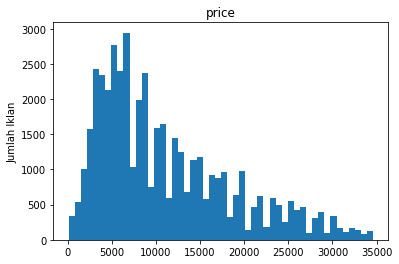

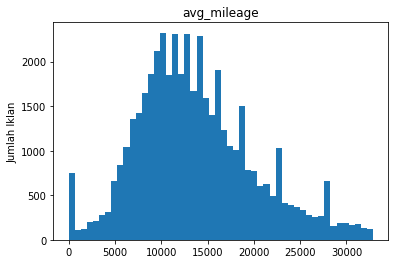

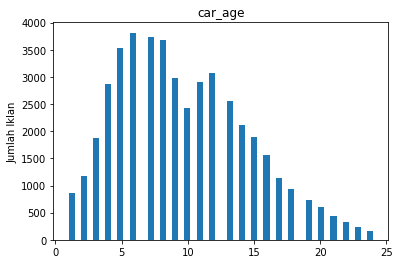

In [48]:
for column in outlier_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a histogram for the column
    ax.hist(data_clean[column], bins=50)

    # Set the x-axis and y-axis labels
    plt.xlabel('')
    plt.ylabel('Jumlah Iklan')
    plt.title(column)

    # Show the plot
    plt.show()

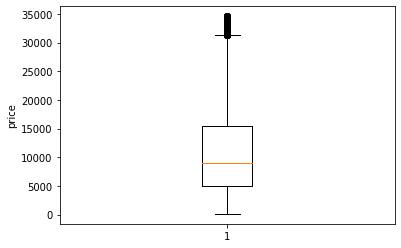

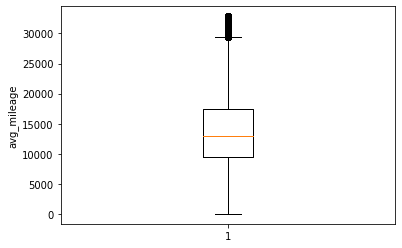

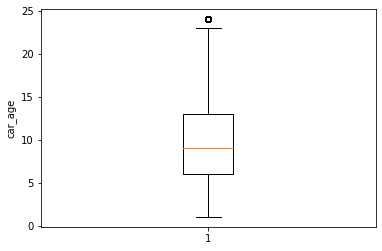

In [49]:
for column in outlier_column:
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot a boxplot for the column
    ax.boxplot(data_clean[column])

    plt.xlabel('')
    plt.ylabel(column)

    # Show the plot
    plt.show()

In [50]:
# Check new dataset statistical data after slicing
data_clean.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,car_age,avg_mileage
count,45636.000000,45636.000000,45636.000000,45636.000000,45636.000000,45636.000000,45636.000000,45636.000000,45636.000000,45636.000000
mean,11084.478876,2009.659786,2.612630,6.042488,117400.764922,0.481309,39.545644,2018.313985,9.654198,13756.977983
std,7612.822477,4.946719,0.702546,1.545289,57201.659765,0.499656,28.187992,0.464115,4.950306,6366.758434
min,105.000000,1995.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,83790.250000,0.000000,19.000000,2018.000000,6.000000,9416.666667
50%,8950.000000,2010.000000,3.000000,6.000000,113000.000000,0.000000,33.000000,2018.000000,9.000000,12875.583333
75%,15500.000000,2013.000000,3.000000,8.000000,149180.000000,1.000000,53.000000,2019.000000,13.000000,17400.000000
max,34595.000000,2019.000000,5.000000,12.000000,710000.000000,1.000000,271.000000,2019.000000,24.000000,32868.250000


In [51]:
# Check new dataset statistical data before slicing
data_new.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,car_age,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.871033,2.637535,6.112450,115162.352179,0.496303,39.55476,2018.307462,9.436429,15844.238152
std,10040.803015,6.145084,0.712447,1.573784,59909.264385,0.499991,28.20427,0.461447,6.158509,12799.650725
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,79181.000000,0.000000,19.00000,2018.000000,5.000000,9416.666667
50%,9000.000000,2011.000000,3.000000,6.000000,113000.000000,0.000000,33.00000,2018.000000,8.000000,13261.250000
75%,16839.000000,2014.000000,3.000000,8.000000,146541.000000,1.000000,53.00000,2019.000000,13.000000,18800.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,111.000000,373200.000000


Setelah outlier dihapus, data terlihat lebih rapih dan terstruktur dengan baik, sehingga dapat memberikan hasil analisis yang lebih akurat dan dapat dipercaya. Data yang bersih dan terstruktur akan memudahkan pengambilan keputusan dan memberikan gambaran yang lebih jelas tentang tren atau pola dalam data yang dihadapi.

## 2.4. Masa Berlalu Iklan

In [52]:
# Check statisctial info about days_listed
data_clean['days_listed'].describe()

count    45636.000000
mean        39.545644
std         28.187992
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

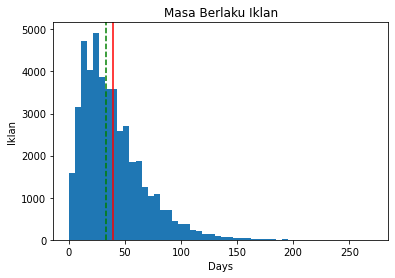

In [53]:
days_mean = data_clean['days_listed'].mean()
days_median = data_clean['days_listed'].median()

fig, ax = plt.subplots()

# plot histogram using the 'days_listed' column of the 'data_clean' DataFrame
ax.hist(data_clean['days_listed'], bins=50)
ax.axvline(days_mean, color='red', linestyle='-', label='Mean')
ax.axvline(days_median, color='green', linestyle='--', label='Median')

ax.set_xlabel('Days')
ax.set_ylabel('Iklan')
ax.set_title('Masa Berlaku Iklan')

plt.show()

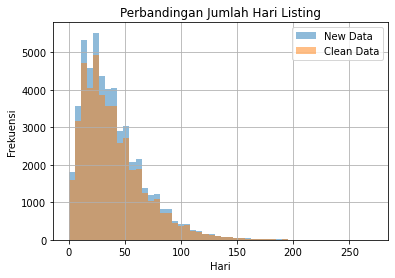

In [54]:
# Compare old and new dataset
fig, ax = plt.subplots()

# Plot histogram of days_listed for new dataset
data_new['days_listed'].hist(bins=50, alpha=0.5, label='New Data')

# Plot histogram of days_listed for clean dataset
data_clean['days_listed'].hist(bins=50, alpha=0.5, label='Clean Data')

# Set the plot title and axis labels
plt.title('Perbandingan Jumlah Hari Listing')
plt.xlabel('Hari')
plt.ylabel('Frekuensi')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

Berdasarkan analisis, iklan mobil ditayangkan selama periode 0 hingga 271 hari, dengan rata-rata waktu iklan ditayangkan sebelum dihapus selama 40 hari dan median 33 hari. Namun, sebagian besar iklan dihapus dalam waktu kurang dari 50 hari setelah ditayangkan. Iklan paling cepat dihapus atau terjual pada hari yang sama dengan ditayangkan, sementara iklan paling lama ditayangkan hingga 271 hari.

## 2.5. Harga Rata-Rata Setiap Jenis Kendaraan

In [ ]:
# Pivot table about avg car price
avg_car_price = data_clean.pivot_table(values='price', 
                                       index='type',
                                       aggfunc=['mean', 'count'])
avg_car_price.columns = ['avg_price', 'total_ads']
print(avg_car_price.sort_values('total_ads', ascending=False))
print(avg_car_price.sort_values('avg_price', ascending=False))

In [ ]:
# Sorted version with bar chart for average car price
fig, ax = plt.subplots()

# Plot bar chart for sorted average car price
sorted_avg_car_price.plot(kind='bar', ax=ax)

# Set the plot title and axis labels
plt.title('Rata-Rata Harga Mobil Berdasarkan Merek')
plt.xlabel('Merek Mobil')
plt.ylabel('Rata-Rata Harga')

# Display the plot
plt.show()

# Sorted version with bar chart for total ads
fig, ax = plt.subplots()

# Plot bar chart for sorted total ads
sorted_avg_car_price_ads.plot(kind='bar', ax=ax)

# Set the plot title and axis labels
plt.title('Jumlah Iklan Berdasarkan Merek Mobil')
plt.xlabel('Merek Mobil')
plt.ylabel('Jumlah Iklan')

# Display the plot
plt.show()

**Kesimpulan**

Mobil tipe sedan dan SUV memiliki jumlah iklan terbanyak dalam dataset. Mobil tipe bus dan truk memiliki harga jual termahal.

## 2.6. Faktor Harga

Analisis korelasi antara mobil tipe sedan dan SUV menunjukkan bahwa usia mobil berkorelasi negatif dengan harga, sedangkan jarak tempuh memiliki korelasi positif dengan harga. Kondisi mobil dan tipe transisi tidak memiliki korelasi yang signifikan dengan harga. Warna mobil juga memiliki korelasi yang relatif rendah dengan harga.

In [ ]:
# Loop for check value counts
for col in ['car_age', 'avg_mileage', 'condition']:
    print(sedan_type[col].value_counts())
    print()

**Kesimpulan Sementara:**

- Sedan mobil dengan usia 6 dan 5 tahun menjadi favorit di antara pembeli karena berhasil terjual paling banyak.
- Sedan dengan rata-rata jarak tempuh yang paling diminati memiliki rentang antara 14890 mile/tahun hingga 17371.666667 mile/tahun.
- Warna mobil sedan yang paling diminati adalah hitam dan putih. Namun, terdapat juga beberapa mobil dengan warna tidak biasa seperti lime green dan bright orange.

In [ ]:
# Scater plot and hexbin plot
sedan_type.plot(x='price', y='car_age', kind='scatter', grid=True, title='Korelasi Harga dengan Usia Mobil Sedan')
sedan_type.plot(x='price', y='car_age', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [ ]:
# Scater plot and hexbin plot
sedan_type.plot(x='price', y='avg_mileage', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Rata-rata Jarak Tempuh/Tahun')
sedan_type.plot(x='price', y='avg_mileage', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [ ]:
# Scater plot and hexbin plot
sedan_type.plot(x='price', y='condition', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Kondisi Mobil')
sedan_type.plot(x='price', y='condition', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [ ]:
# Check correlation
print(sedan_type['price'].corr(sedan_type['car_age']))
print(sedan_type['price'].corr(sedan_type['avg_mileage']))
print(sedan_type['price'].corr(sedan_type['condition']))

**Kesimpulan**

- Grafik menunjukkan bahwa semakin rendah nilai milage, harga mobil semakin tinggi. Selain itu, mobil dengan milage 0 memiliki harga yang lebih tinggi daripada mobil dengan milage di atas 0. Harga mobil dengan milage rendah dan sedang berkisar di antara 5000 dolar - 15000 dolar.
- Plot korelasi harga dengan rata-rata jarak tempuh menunjukkan bahwa tidak ada hubungan linier antara harga dan rata-rata jarak tempuh mobil sedan. Hal ini ditunjukkan oleh data yang terkumpul dalam area yang sama, menunjukkan tidak adanya korelasi antara variabel tersebut.
- Hal ini menunjukkan bahwa pembeli cenderung mempertimbangkan kondisi mobil saat membeli, sehingga mobil dengan kondisi yang lebih baik cenderung memiliki harga yang lebih tinggi. Selain itu, tipe mobil sedan dengan kondisi 3 dan 2 merupakan pilihan yang paling diminati oleh pembeli dengan harga yang masih terjangkau.
- Korelasi antara harga dengan usia mobil menunjukkan bahwa semakin tua usia mobil, maka semakin murah harga mobil tersebut. Sementara itu, korelasi antara harga dengan rata-rata jarak tempuh per tahun serta kondisi mobil menunjukkan bahwa semakin baik kondisi mobil dan semakin rendah rata-rata jarak tempuh per tahunnya, maka semakin tinggi harga mobil. Namun, korelasi antara harga dengan kedua faktor tersebut cenderung lemah atau mendekati nol, sehingga dapat disimpulkan bahwa tidak ada korelasi yang kuat antara harga dengan rata-rata jarak tempuh per tahun atau kondisi mobil.

In [ ]:
# Loop for check value counts
for col in ['transmission', 'paint_color']:
    print(sedan_type[col].value_counts())
    print()

In [ ]:
# Create a boxplot
sedan_type.boxplot(column='price', by='transmission')

# Set grid
plt.grid(True)

In [ ]:
# Create a boxplot
sedan_type.boxplot(column='price', by='paint_color')

plt.xticks(rotation=50)
plt.grid(True)

**Kesimpulan Sementara:**

- Tipe transisi matic merupakan pilihan yang paling diminati oleh pembeli mobil sedan.
- Terjual paling banyak, mobil sedan dengan warna tidak diketahui, diikuti oleh mobil berwarna silver dan hitam.
- Boxplot menunjukkan bahwa tidak terdapat perbedaan signifikan dalam harga mobil sedan berdasarkan tipe transmisi dan warna, dengan distribusi data yang relatif seragam. Hal ini menunjukkan bahwa kedua faktor tersebut tidak memiliki korelasi yang kuat dengan harga mobil sedan.

In [ ]:
# Loop for check value counts
for col in ['car_age', 'avg_mileage', 'condition']:
    print(suv_type[col].value_counts())
    print()

**Kesimpulan Sementara:**

- SUV yang berusia 7 dan 11 tahun menjadi pilihan populer di antara pembeli mobil karena berhasil terjual paling banyak.
- SUV dengan rata-rata jarak tempuh 13028.750000 dan 17371.666667 mile/year paling diminati oleh pembeli.
- Mobil SUV dengan kondisi good(3) dan fair(2) menjadi pilihan utama pembeli.

In [ ]:
# Scater plot and hexbin plot
suv_type.plot(x='price', y='car_age', kind='scatter', grid=True, title='Korelasi Harga dengan Usia Mobil SUV')
suv_type.plot(x='price', y='car_age', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [ ]:
# Scater plot and hexbin plot
suv_type.plot(x='price', y='avg_mileage', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Rata-rata Jarak Tempuh/Tahun')
suv_type.plot(x='price', y='avg_mileage', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [ ]:
# Scater plot and hexbin plot
suv_type.plot(x='price', y='condition', kind='scatter', alpha=0.2, grid=True, title='Korelasi Harga dengan Kondisi Mobil')
suv_type.plot(x='price', y='condition', kind='hexbin', gridsize=20, sharex=False, grid=True) 

In [ ]:
# Check correlation
print(suv_type['price'].corr(suv_type['car_age']))
print(suv_type['price'].corr(suv_type['avg_mileage']))
print(suv_type['price'].corr(suv_type['condition']))

**Kesimpulan**

- Plot menunjukkan hubungan negatif antara harga dan usia mobil SUV, di mana mobil yang lebih tua cenderung memiliki harga yang lebih rendah. Terdapat kumpulan data yang menunjukkan bahwa mobil SUV berusia sekitar 4-17 tahun memiliki harga antara 2000 hingga 15000 dolar.
- Korelasi antara harga dan rata-rata jarak tempuh pada mobil SUV tidak terlihat karena semua data terkumpul dalam area yang sama pada plot korelasi.
- Harga mobil SUV memiliki korelasi positif dengan kondisi mobil, di mana semakin baik kondisi mobil maka harga mobil semakin tinggi. Paling banyak peminat SUV pada kondisi 2 dan 3 dengan rentang harga sekitar 3000 dolar hingga 18000 dolar.
- Korelasi antara harga mobil SUV dengan usia mobil dan rata-rata jarak tempuh per tahun saling berlawanan dan kuat, sedangkan korelasi antara harga mobil dengan kondisi mobil hampir tidak ada pada tipe SUV.

In [ ]:
for col in ['transmission', 'paint_color']:
    print(suv_type[col].value_counts())
    print()

In [ ]:
# Create a boxplot
suv_type.boxplot(column='price', by='transmission')

# Set the grid
plt.grid(True)

In [ ]:
# Create a boxplot
sedan_type.boxplot(column='price', by='paint_color')

# Set the grid
plt.grid(True)

**Kesimpulan Sementara**

- Tipe transmisi matic merupakan tipe paling diminati pada mobil sedan.
- Mobil sedan dengan warna tidak diketahui menjadi pilihan utama pembeli, namun mobil berwarna hitam dan putih juga cukup diminati.
- Boxplot menunjukkan bahwa tidak terdapat perbedaan signifikan dalam harga mobil berdasarkan tipe transmisi maupun warna mobil, sehingga dapat disimpulkan bahwa tidak terdapat korelasi antara kedua faktor tersebut dengan harga mobil.

## Kesimpulan Umum

### A. Pra-pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:

 1. Dataset terdiri dari 51525 baris dan 13 kolom, namun terdapat 5 kolom dengan missing value, yaitu model_year, cylinders, odometer, paint_color, dan is_4wd.
 2. Tidak terdapat duplikat pada dataset yang dianalisis.
 3. Dataset dilakukan pemeriksaan terhadap nilai-nilai yang hilang, tipe, dan polanya. Kemudian, nilai-nilai yang hilang diisi dengan menggunakan variabel tertentu dan median data, selain itu dilakukan perbaikan terhadap tipe data dan kualitas data. Pada akhirnya, beberapa kolom ditambahkan ke dalam dataset.
 
### B. Analisis Data Eksploratif (EDA)
 
Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:
    
 1. Evaluasi parameter price, car_age, avg_mileage, condition, dan cylinders untuk memastikan akurasi data.
 2. Dataset awal mengandung outlier pada kolom price, avg_mileage, dan car_age, sehingga dibuat dataset baru tanpa outlier dengan jumlah baris yang lebih sedikit yaitu 45660.
 3. Frasa tersebut sudah cukup jelas dan padat. Tidak perlu perubahan.
 4. Tipe mobil yang paling populer adalah sedan dan SUV.
 5. Mobil SUV dan sedan memiliki hubungan korelasi negatif yang kuat antara harga dengan usia mobil, yang artinya semakin muda usia mobil maka semakin tinggi harga mobil tersebut.
 6. Dataset sedan dan SUV menunjukkan bahwa tidak terdapat korelasi yang signifikan antara rata-rata jarak per tahun, kondisi mobil, tipe transmisi, dan warna mobil dengan harga.